In [15]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [16]:
# 제출 점수(제출 날짜) : 0.6466670006(2021-12-20 11:04:42)

# 설정

In [17]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [18]:
# 차이가 비교적 많이 나는 특성(22개)

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

In [19]:
# pycaret, nb
# tune : ❌(자체 점수 떨어짐.)
# combine
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 데이터 불러오기

In [20]:
# ../data/train.csv
# ../data/test.csv
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [22]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [24]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [25]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [26]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [27]:
# 차이가 비교적 많이 나는 특성(22개)

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h
# 22개 특성

In [28]:
train = train[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h', 'target']]
test = test[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h']]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   person_attribute_a      501951 non-null  int64
 4   person_attribute_a_1    501951 non-null  int64
 5   person_attribute_b      501951 non-null  int64
 6   person_prefer_c         501951 non-null  int64
 7   person_prefer_d_1       501951 non-null  int64
 8   person_prefer_d_2       501951 non-null  int64
 9   person_prefer_d_3       501951 non-null  int64
 10  person_prefer_e         501951 non-null  int64
 11  person_prefer_h_1       501951 non-null  int64
 12  person_prefer_h_2       501951 non-null  int64
 13  person_prefer_h_3       501951 non-null  int64
 14  contents_attribute_j    501951 non-null  int64
 15  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [30]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,True,True,1,4,3,5,275,370,369,8,4,95,59,2,10,1,1608,275,1,4,139,1
1,False,False,False,1,3,4,1,114,181,175,4,131,101,96,1,5,1,1608,275,1,4,133,0
2,False,False,False,2,0,3,5,464,175,452,3,54,263,56,2,10,1,1600,94,1,4,53,0
3,False,False,False,2,0,2,5,703,705,704,3,72,227,2,1,5,1,1608,275,5,3,74,0
4,True,True,True,1,3,4,5,275,370,369,4,214,210,209,2,10,1,1608,275,1,4,74,0


In [31]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,True,False,False,1,1,2,1,857,851,1227,4,263,56,49,2,10,1,1147,839,1,5,263
1,False,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,5,1,1611,278,1,4,263
2,True,False,False,2,3,2,1,514,790,1233,0,177,170,171,1,3,1,1817,490,3,4,177
3,True,False,False,1,2,2,5,114,181,175,4,177,170,171,1,5,1,101,150,5,3,177
4,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,1,5,1,985,1097,1,4,177


# 모델 학습/예측

In [ ]:
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [32]:
ex = setup(train, target='target', n_jobs=3, session_id=0, verbose=False, silent=False, 
 fold=5, fold_shuffle=True, combine_rare_levels=True,
 numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'])

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
d_l_match_yn,Categorical
d_m_match_yn,Categorical
d_s_match_yn,Categorical
person_attribute_a,Categorical
person_attribute_a_a,Numeric
person_attribute_b,Numeric
person_prefer_c,Categorical
person_prefer_d_1,Numeric
person_prefer_d_2,Numeric
person_prefer_d_3,Numeric


In [33]:
compare_models(sort='F1')
# 42m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5440,0.5950,0.8565,0.5269,0.6524,0.0885,0.1134,0.606
catboost,CatBoost Classifier,0.6205,0.6675,0.6732,0.6087,0.6394,0.2411,0.2425,77.380
lightgbm,Light Gradient Boosting Machine,0.6104,0.6554,0.6738,0.5977,0.6335,0.2208,0.2226,6.214
rf,Random Forest Classifier,0.6071,0.6517,0.6201,0.6040,0.6119,0.2141,0.2142,79.940
gbc,Gradient Boosting Classifier,0.5969,0.6374,0.6350,0.5898,0.6115,0.1939,0.1945,78.436
ada,Ada Boost Classifier,0.5900,0.6282,0.6168,0.5851,0.6005,0.1800,0.1803,17.674
et,Extra Trees Classifier,0.5893,0.6268,0.5894,0.5889,0.5892,0.1786,0.1786,77.026
ridge,Ridge Classifier,0.5824,0.0000,0.5968,0.5798,0.5881,0.1648,0.1649,0.480
lda,Linear Discriminant Analysis,0.5824,0.6157,0.5968,0.5797,0.5881,0.1648,0.1648,2.686
lr,Logistic Regression,0.5808,0.6115,0.5894,0.5792,0.5842,0.1617,0.1617,58.398


GaussianNB(priors=None, var_smoothing=1e-09)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [34]:
model = create_model('nb')
# 9s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5420,0.5934,0.8514,0.5257,0.6500,0.0843,0.1074
1,0.5441,0.5928,0.8504,0.5271,0.6508,0.0886,0.1121
2,0.5443,0.5954,0.8602,0.5270,0.6536,0.0890,0.1149
3,0.5470,0.5976,0.8636,0.5285,0.6557,0.0943,0.1218
4,0.5429,0.5955,0.8567,0.5262,0.6519,0.0863,0.1108
Mean,0.5440,0.5950,0.8565,0.5269,0.6524,0.0885,0.1134
SD,0.0017,0.0017,0.0050,0.0010,0.0020,0.0034,0.0049


In [35]:
tuned_model = tune_model(model)
# 15s
# tune : ❌

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5737,0.6067,0.6538,0.5632,0.6052,0.1475,0.1495
1,0.5740,0.6056,0.6483,0.5641,0.6033,0.1480,0.1497
2,0.5773,0.6080,0.6546,0.5667,0.6075,0.1547,0.1566
3,0.5777,0.6106,0.6455,0.5682,0.6044,0.1555,0.1570
4,0.5746,0.6059,0.6518,0.5643,0.6049,0.1493,0.1511
Mean,0.5755,0.6073,0.6508,0.5653,0.6050,0.1510,0.1528
SD,0.0017,0.0018,0.0034,0.0018,0.0014,0.0034,0.0033


In [36]:
pred = predict_model(model, test)

In [37]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,Label,Score
0,True,False,False,1,1,2,1,857,851,1227,4,263,56,49,2,10,1,1147,839,1,5,263,1,0.6483
1,False,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,5,1,1611,278,1,4,263,0,0.5751
2,True,False,False,2,3,2,1,514,790,1233,0,177,170,171,1,3,1,1817,490,3,4,177,0,0.9970
3,True,False,False,1,2,2,5,114,181,175,4,177,170,171,1,5,1,101,150,5,3,177,1,0.9172
4,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,1,5,1,985,1097,1,4,177,1,0.8785


In [38]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.6483
1,0,0.5751
2,0,0.9970
3,1,0.9172
4,1,0.8785


In [39]:
pred['Label'].value_counts()

1    36452
0     9952
Name: Label, dtype: int64

# 제출파일 생성

In [40]:
# ../data/sample_submission.csv
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver1.3.csv', index=False)

# 모델 분석 그래프

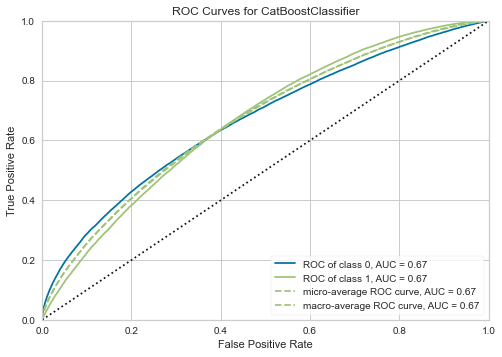

In [ ]:
plot_model(nb)